In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<img src="WhatsApp Image 2023-09-28 at 5.54.39 AM.jpeg" alt="Image Alt Text">

In [2]:
df = open('sample.csv', encoding='windows-1252')

In [3]:
df = pd.read_csv(df)

# Dataset Exploration

In [4]:
df.shape

(9994, 21)

Using the .shape attribute, i observed that this dataset has 21 columns and 9994 rows

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

These are the names of the columns in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Observation: This dataset doesn't have empty values

In [8]:
# Identify columns with 0s
column_0 = df.columns[(df == 0).any()]

print(column_0)

Index(['Discount', 'Profit'], dtype='object')


In [9]:
# Calculate the percentage of 0s in each column
percentage0 = (df == 0).mean() * 100

print(percentage0)

Row ID            0.000000
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Ship Mode         0.000000
Customer ID       0.000000
Customer Name     0.000000
Segment           0.000000
Country           0.000000
City              0.000000
State             0.000000
Postal Code       0.000000
Region            0.000000
Product ID        0.000000
Category          0.000000
Sub-Category      0.000000
Product Name      0.000000
Sales             0.000000
Quantity          0.000000
Discount         48.008805
Profit            0.650390
dtype: float64


## Identifying Categorical and Numerical data

In [10]:
categorical_vars = df.select_dtypes(include=['object', 'category'])
numerical_vars = df.select_dtypes(include=['int', 'float'])

In [11]:
print("Categorical Variables:")
print(categorical_vars.columns)

print("\nNumerical Variables:")
print(numerical_vars.columns)

Categorical Variables:
Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

Numerical Variables:
Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [12]:
continuous_vars = []
discrete_vars = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        if len(df[column].unique()) > 20:
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)

# Print the identified variables
print("Continuous Variables:")
print(continuous_vars)

print("\nDiscrete Variables:")
print(discrete_vars)

Continuous Variables:
['Row ID', 'Postal Code', 'Sales', 'Profit']

Discrete Variables:
['Quantity', 'Discount']


# Summary Statistics of Selected Columns

In [13]:
#sales
df['Sales'].describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

**Observation:**
- The minimum sales amount is 0.44
- The maximum is 22638

In [14]:
df['Profit'].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

In [15]:
# identifying duplicate rows
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No Duplicate Rows Found.")


No Duplicate Rows Found.


# Exploring this data using pivot tables

# **Sales Analysis:**

- What is the total sales revenue for each product category?
- How do sales vary across different regions?
- What is the average discount rate for each product sub-category?
- Which products have the highest and lowest sales?

# What is the total sales revenue for each product category?

In [16]:
category_sales = pd.pivot_table(df, values='Sales', index='Category', aggfunc='sum')
print(category_sales)

                       Sales
Category                    
Furniture        741999.7953
Office Supplies  719047.0320
Technology       836154.0330


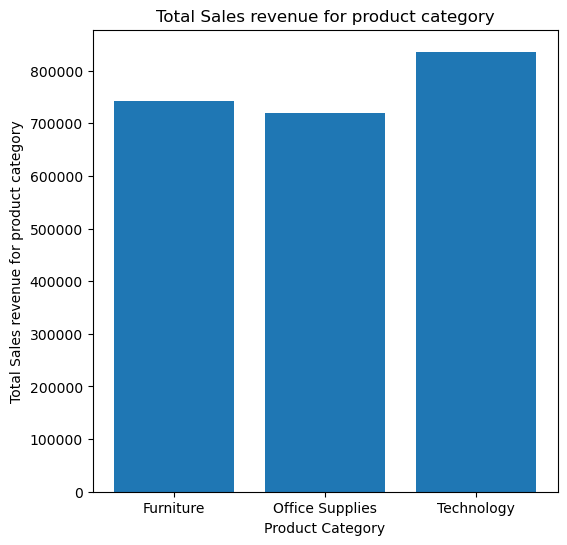

In [17]:
# plot
plt.figure(figsize=(6, 6))
plt.bar(category_sales.index, category_sales['Sales']) 
plt.xlabel('Product Category')
plt.ylabel('Total Sales revenue for product category')
plt.title('Total Sales revenue for product category')
plt.show()

**Observation:**
The Technology product category ranks higher when analyzed based on Total Sales revenue

# How do sales vary across different regions?

In [18]:
region_sales = pd.pivot_table(df, values='Sales', index='Region', aggfunc='sum')
print(region_sales)

               Sales
Region              
Central  501239.8908
East     678781.2400
South    391721.9050
West     725457.8245


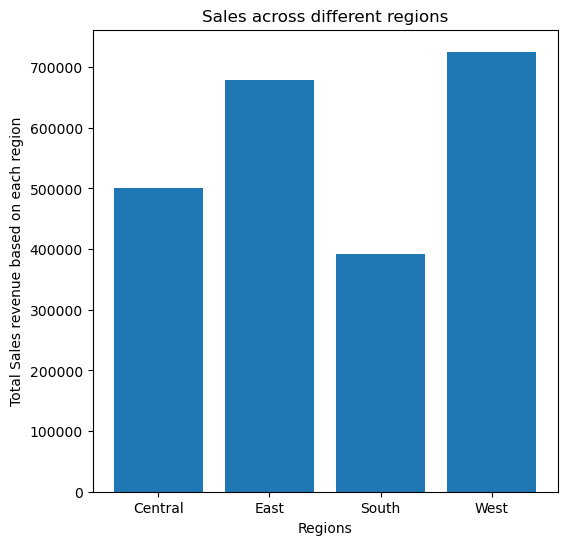

In [19]:
# plot
plt.figure(figsize=(6, 6))
plt.bar(region_sales.index, region_sales['Sales']) 
plt.xlabel('Regions')
plt.ylabel('Total Sales revenue based on each region')
plt.title('Sales across different regions')
plt.show()

**Observation:**
- The West and East regions ranks higher.
- The South region ranks lower. The firm should pay attention to this region

# What is the average discount rate for each product sub-category?

In [20]:
subcategory_discount = pd.pivot_table(df, values='Discount', index='Sub-Category', aggfunc='mean')
print(subcategory_discount)

              Discount
Sub-Category          
Accessories   0.078452
Appliances    0.166524
Art           0.074874
Binders       0.372292
Bookcases     0.211140
Chairs        0.170178
Copiers       0.161765
Envelopes     0.080315
Fasteners     0.082028
Furnishings   0.138349
Labels        0.068681
Machines      0.306087
Paper         0.074891
Phones        0.154556
Storage       0.074704
Supplies      0.076842
Tables        0.261285


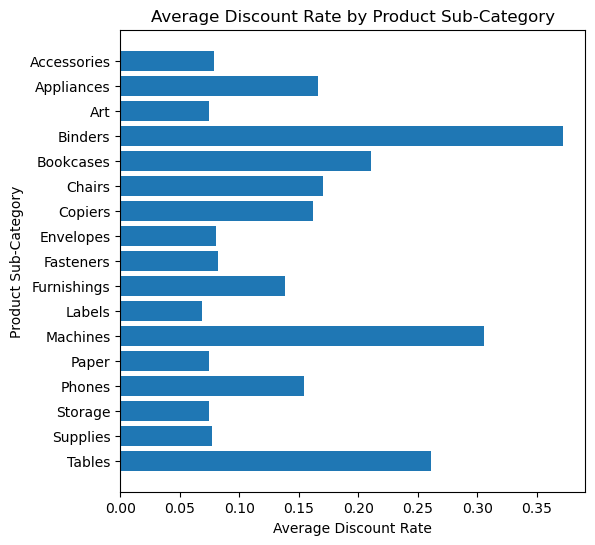

In [21]:
# plot
plt.figure(figsize=(6, 6))
plt.barh(subcategory_discount.index, subcategory_discount['Discount'])
plt.xlabel('Average Discount Rate')
plt.ylabel('Product Sub-Category')
plt.title('Average Discount Rate by Product Sub-Category')
plt.gca().invert_yaxis()
plt.show()

**Observation:**
- The Binders products ranks higher

# Which products have the highest and lowest sales?

In [22]:
sales = df.groupby('Product Name')['Sales'].sum().reset_index()

highest_sales_products = sales.nlargest(1, 'Sales')

lowest_sales_products = sales.nsmallest(1, 'Sales')

print("Product with Highest Sales:")
print(highest_sales_products)

print("\nProduct with Lowest Sales:")
print(lowest_sales_products)

Product with Highest Sales:
                              Product Name      Sales
404  Canon imageCLASS 2200 Advanced Copier  61599.824

Product with Lowest Sales:
                                          Product Name  Sales
605  Eureka Disposable Bags for Sanitaire Vibra Gro...  1.624


# **Order and Customer Analysis:**

- How many orders were placed in each month of the year?
- What is the average order quantity for each customer segment?
- Which cities have the highest and lowest order counts?
- What is the average profit margin for orders shipped by different modes?

# Number of Orders Placed in Each Month of the Year:

In [23]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


df['Order Month'] = df['Order Date'].dt.strftime('%Y-%m')

monthly_orders = df.groupby('Order Month').size().reset_index(name='Number of Orders')

# Display the result
print(monthly_orders)

   Order Month  Number of Orders
0      2014-01                79
1      2014-02                46
2      2014-03               157
3      2014-04               135
4      2014-05               122
5      2014-06               135
6      2014-07               143
7      2014-08               153
8      2014-09               268
9      2014-10               159
10     2014-11               318
11     2014-12               278
12     2015-01                58
13     2015-02                64
14     2015-03               138
15     2015-04               160
16     2015-05               146
17     2015-06               138
18     2015-07               140
19     2015-08               159
20     2015-09               293
21     2015-10               166
22     2015-11               324
23     2015-12               316
24     2016-01                89
25     2016-02                83
26     2016-03               163
27     2016-04               170
28     2016-05               225
29     201

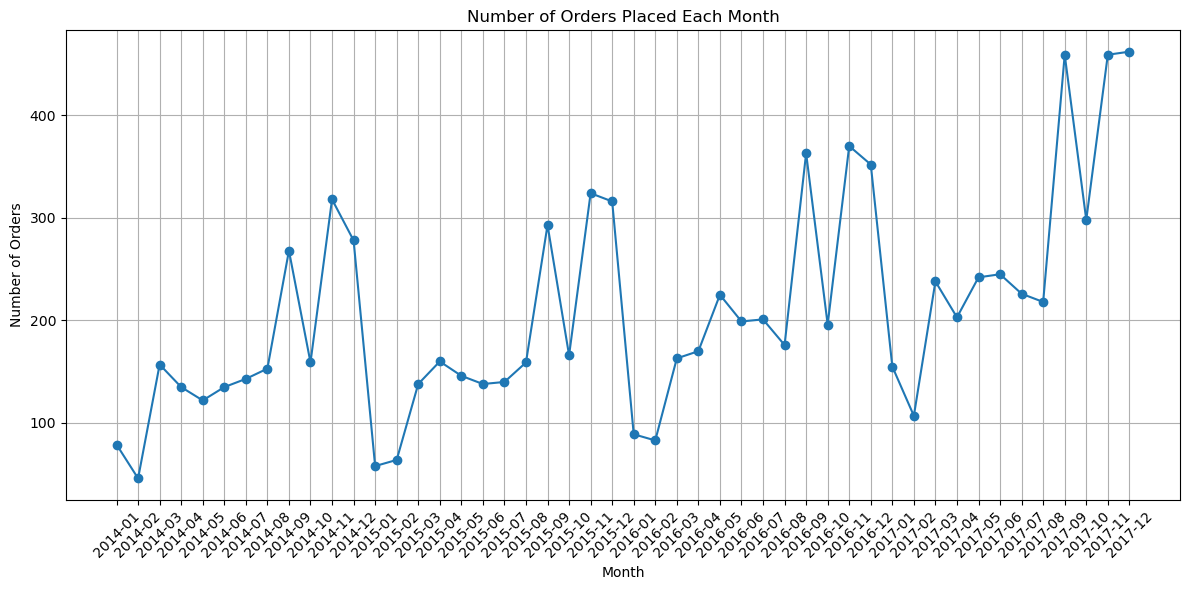

In [24]:
# Sort the data by date
monthly_orders.sort_values(by='Order Month', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['Order Month'], monthly_orders['Number of Orders'], marker='o', linestyle='-')
plt.title('Number of Orders Placed Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45) 

plt.grid(True)
plt.tight_layout()
plt.show()

# Average Order Quantity for Each Customer Segment:

In [25]:
avg_quantity = pd.pivot_table(df, values='Quantity', index='Segment', aggfunc='mean')

# Display the result
print(avg_quantity)

             Quantity
Segment              
Consumer     3.760547
Corporate    3.843709
Home Office  3.782389


# Cities with Highest and Lowest Order Counts:

In [26]:
city_counts = df.groupby('City').size().reset_index(name='Order Count')


highest_order_cities = city_counts.nlargest(1, 'Order Count')
lowest_order_cities = city_counts.nsmallest(1, 'Order Count')


print("City with the Highest Order Count:")
print(highest_order_cities)

print("\nCity with the Lowest Order Count:")
print(lowest_order_cities)

City with the Highest Order Count:
              City  Order Count
329  New York City          915

City with the Lowest Order Count:
       City  Order Count
0  Aberdeen            1


# Average Profit Margin for Orders Shipped by Different Modes:

In [27]:
ship_mode = pd.pivot_table(df, values='Profit', index='Ship Mode', aggfunc='mean')

# Display the result
print(ship_mode)

                   Profit
Ship Mode                
First Class     31.839948
Same Day        29.266591
Second Class    29.535545
Standard Class  27.494770


# **Segmentation Analysis:**

- Which customer segments contribute the most to sales and profit?
- How is sales performance across different regions?
- How is profit performance across different regions?
- How does the average discount rate differ among customer segments?

# Customer Segments Contributing Most to Sales and Profit:

In [28]:
segment_profit = pd.pivot_table(df, values=['Sales', 'Profit'], index='Segment', aggfunc='sum')
print(segment_profit)

                  Profit         Sales
Segment                               
Consumer     134119.2092  1.161401e+06
Corporate     91979.1340  7.061464e+05
Home Office   60298.6785  4.296531e+05


**Observation:** Consumer segment brings more profits

# How is sales performance across different regions?

In [29]:
category_region_sales = pd.pivot_table(df, values='Sales', index=['Region', 'Category'], aggfunc='sum')
print(category_region_sales)

                               Sales
Region  Category                    
Central Furniture        163797.1638
        Office Supplies  167026.4150
        Technology       170416.3120
East    Furniture        208291.2040
        Office Supplies  205516.0550
        Technology       264973.9810
South   Furniture        117298.6840
        Office Supplies  125651.3130
        Technology       148771.9080
West    Furniture        252612.7435
        Office Supplies  220853.2490
        Technology       251991.8320


**Observations:**
- In the Central region, the Technology category generates more sales when compared to the other categories
- In the East region, Technology still ranks higher
- In the South region, Technology still generates more sales
- In the West region, it's different and Furniture generated more sales than Technology

# How is profit performance across different regions?

In [30]:
category_region_profit = pd.pivot_table(df, values='Profit', index=['Region', 'Category'], aggfunc='sum')
print(category_region_profit)

                             Profit
Region  Category                   
Central Furniture        -2871.0494
        Office Supplies   8879.9799
        Technology       33697.4320
East    Furniture         3046.1658
        Office Supplies  41014.5791
        Technology       47462.0351
South   Furniture         6771.2061
        Office Supplies  19986.3928
        Technology       19991.8314
West    Furniture        11504.9503
        Office Supplies  52609.8490
        Technology       44303.6496


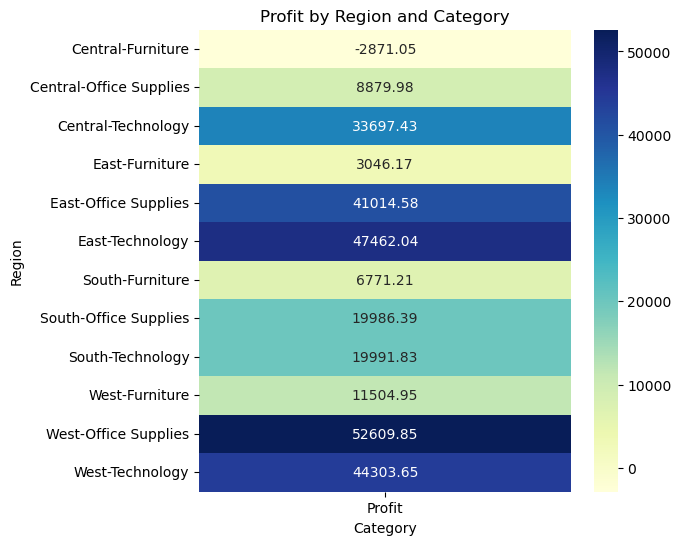

In [31]:
# Create a heatmap
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(category_region_profit, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Profit by Region and Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.show()

**Observation:**
- Each cell in this heatmap corresponds to a unique combination of a region and a product category based on data from the given dataset. The color intensity of each cell represents the value of profit associated with this question. In this case, darker colors typically represent higher profit values, while lighter colors represent lower profit values.

# Average Discount Rate Among Customer Segments:

In [32]:
avg_discount = pd.pivot_table(df, values='Discount', index='Segment', aggfunc='mean')
print(avg_discount)

             Discount
Segment              
Consumer     0.158141
Corporate    0.158228
Home Office  0.147128


# **Geographical Analysis:**

- Which states or cities have the highest and lowest sales and profit figures?
- Is there a relationship between shipping mode and delivery time across different regions?

# Relationship Between Shipping Mode and Delivery Time Across Different Regions:

In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
shipping_mode_delivery_time = pd.pivot_table(df, values='Delivery Time', index='Ship Mode', columns='Region', aggfunc='mean')
print(shipping_mode_delivery_time)

Region           Central      East     South      West
Ship Mode                                             
First Class     2.317726  2.224490  2.111111  2.097087
Same Day        0.033333  0.000000  0.012048  0.102703
Second Class    3.331183  3.266038  3.194529  3.167472
Standard Class  4.990271  4.967723  4.995893  5.058980


# States or Cities with Highest and Lowest Sales and Profit Figures:

In [36]:
sales_profit = pd.pivot_table(df, values=['Sales', 'Profit'], index='State', aggfunc='sum')


highest_sales_states = sales_profit.nlargest(1, 'Sales')
lowest_sales_states = sales_profit.nsmallest(1, 'Sales')

highest_profit_states = sales_profit.nlargest(1, 'Profit')
lowest_profit_states = sales_profit.nsmallest(1, 'Profit')


city_sales_profit = pd.pivot_table(df, values=['Sales', 'Profit'], index='City', aggfunc='sum')

highest_sales_cities = city_sales_profit.nlargest(1, 'Sales')
lowest_sales_cities = city_sales_profit.nsmallest(1, 'Sales')

highest_profit_cities = city_sales_profit.nlargest(1, 'Profit')
lowest_profit_cities = city_sales_profit.nsmallest(1, 'Profit')

print("States with the Highest Sales:")
print(highest_sales_states)
print("\nStates with the Lowest Sales:")
print(lowest_sales_states)

print("\nStates with the Highest Profit:")
print(highest_profit_states)
print("\nStates with the Lowest Profit:")
print(lowest_profit_states)

print("\nCities with the Highest Sales:")
print(highest_sales_cities)
print("\nCities with the Lowest Sales:")
print(lowest_sales_cities)

print("\nCities with the Highest Profit:")
print(highest_profit_cities)
print("\nCities with the Lowest Profit:")
print(lowest_profit_cities)

States with the Highest Sales:
                Profit        Sales
State                              
California  76381.3871  457687.6315

States with the Lowest Sales:
                Profit   Sales
State                         
North Dakota  230.1497  919.91

States with the Highest Profit:
                Profit        Sales
State                              
California  76381.3871  457687.6315

States with the Lowest Profit:
           Profit        Sales
State                         
Texas -25729.3563  170188.0458

Cities with the Highest Sales:
                   Profit       Sales
City                                 
New York City  62036.9837  256368.161

Cities with the Lowest Sales:
         Profit  Sales
City                  
Abilene -3.7584  1.392

Cities with the Highest Profit:
                   Profit       Sales
City                                 
New York City  62036.9837  256368.161

Cities with the Lowest Profit:
                  Profit       Sales
City     

In [37]:
# A DataFrame to display the results
result_df = pd.DataFrame({
    'Category': ['States with Highest Sales', 'States with Lowest Sales', 'States with Highest Profit', 'States with Lowest Profit',
                 'Cities with Highest Sales', 'Cities with Lowest Sales', 'Cities with Highest Profit', 'Cities with Lowest Profit'],
    'State/City': [highest_sales_states.index[0], lowest_sales_states.index[0], highest_profit_states.index[0], lowest_profit_states.index[0],
                   highest_sales_cities.index[0], lowest_sales_cities.index[0], highest_profit_cities.index[0], lowest_profit_cities.index[0]],
    'Sales/Profit': [highest_sales_states['Sales'][0], lowest_sales_states['Sales'][0], highest_profit_states['Profit'][0], lowest_profit_states['Profit'][0],
              highest_sales_cities['Sales'][0], lowest_sales_cities['Sales'][0], highest_profit_cities['Profit'][0], lowest_profit_cities['Profit'][0]]
})

print(result_df)

                     Category     State/City  Sales/Profit
0   States with Highest Sales     California   457687.6315
1    States with Lowest Sales   North Dakota      919.9100
2  States with Highest Profit     California    76381.3871
3   States with Lowest Profit          Texas   -25729.3563
4   Cities with Highest Sales  New York City   256368.1610
5    Cities with Lowest Sales        Abilene        1.3920
6  Cities with Highest Profit  New York City    62036.9837
7   Cities with Lowest Profit   Philadelphia   -13837.7674


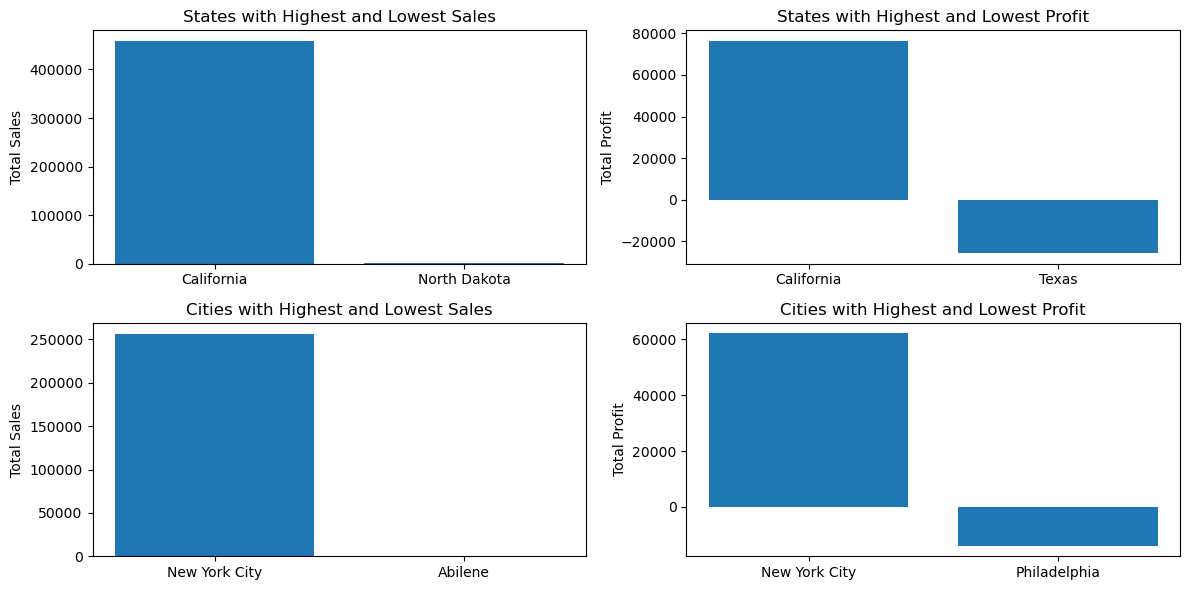

In [38]:
# Visualize the results with bar plots
plt.figure(figsize=(12, 6))

# Plot highest and lowest sales for states
plt.subplot(2, 2, 1)
plt.bar([highest_sales_states.index[0], lowest_sales_states.index[0]], [highest_sales_states['Sales'][0], lowest_sales_states['Sales'][0]])
plt.title('States with Highest and Lowest Sales')
plt.ylabel('Total Sales')

# Plot highest and lowest profit for states
plt.subplot(2, 2, 2)
plt.bar([highest_profit_states.index[0], lowest_profit_states.index[0]], [highest_profit_states['Profit'][0], lowest_profit_states['Profit'][0]])
plt.title('States with Highest and Lowest Profit')
plt.ylabel('Total Profit')

# Plot highest and lowest sales for cities
plt.subplot(2, 2, 3)
plt.bar([highest_sales_cities.index[0], lowest_sales_cities.index[0]], [highest_sales_cities['Sales'][0], lowest_sales_cities['Sales'][0]])
plt.title('Cities with Highest and Lowest Sales')
plt.ylabel('Total Sales')

# Plot highest and lowest profit for cities
plt.subplot(2, 2, 4)
plt.bar([highest_profit_cities.index[0], lowest_profit_cities.index[0]], [highest_profit_cities['Profit'][0], lowest_profit_cities['Profit'][0]])
plt.title('Cities with Highest and Lowest Profit')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

# **Category and Sub-Category Analysis:**

- Which product categories and sub-categories are the most and least popular?
- Are there any trends or patterns in sales for specific sub-categories over time?
- How does the discount rate vary for products in different categories?

# Most and Least Popular Product Categories and Sub-Categories Based On Sales:

In [39]:
most_popular_categories = df.groupby('Category')['Sales'].sum().nlargest(1)
least_popular_categories = df.groupby('Category')['Sales'].sum().nsmallest(1)

most_popular_subcategories = df.groupby('Sub-Category')['Sales'].sum().nlargest(1)
least_popular_subcategories = df.groupby('Sub-Category')['Sales'].sum().nsmallest(1)

print("Most Popular Product Categories:")
print(most_popular_categories)

print("\nLeast Popular Product Categories:")
print(least_popular_categories)

print("\nMost Popular Product Sub-Categories:")
print(most_popular_subcategories)

print("\nLeast Popular Product Sub-Categories:")
print(least_popular_subcategories)


Most Popular Product Categories:
Category
Technology    836154.033
Name: Sales, dtype: float64

Least Popular Product Categories:
Category
Office Supplies    719047.032
Name: Sales, dtype: float64

Most Popular Product Sub-Categories:
Sub-Category
Phones    330007.054
Name: Sales, dtype: float64

Least Popular Product Sub-Categories:
Sub-Category
Fasteners    3024.28
Name: Sales, dtype: float64


Observation:
- In the product category, Technology is the most popular
- In the product category, Office supplies is the least popular
- In the product sub-category, Phones is the most popular
- In the product sub-category, Fasteners is the least popular

# Variation in Discount Rate for Products in Different Categories:

In [40]:
avg_discount = pd.pivot_table(df, values='Discount', index='Category', aggfunc='mean')

print(avg_discount)

                 Discount
Category                 
Furniture        0.173923
Office Supplies  0.157285
Technology       0.132323


Observation: Furniture category ranks higher

**Order Fulfillment Analysis:**

- What percentage of orders were shipped on time, ahead of time, or delayed?
- Is there a correlation between shipping mode and order delivery time?
- How does order fulfillment performance vary across different segments?

# Calculate Order Fulfillment Metrics:

In [41]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

def delivery_status(row):
    if row['Delivery Time'] <= 0:
        return 'On Time'
    elif row['Delivery Time'] > 0:
        return 'Ahead of Time'
    else:
        return 'Delayed'

df['Delivery Status'] = df.apply(delivery_status, axis=1)

delivery_status_percentage = df['Delivery Status'].value_counts(normalize=True) * 100

print("Order Fulfillment Analysis:")
print(delivery_status_percentage)

Order Fulfillment Analysis:
Delivery Status
Ahead of Time    94.806884
On Time           5.193116
Name: proportion, dtype: float64


# Analyze Correlation Between Shipping Mode and Order Delivery Time:

In [42]:
mode_delivery_time = pd.pivot_table(df, values='Delivery Time', index='Ship Mode', aggfunc='mean')

print("Correlation Between Shipping Mode and Order Delivery Time:")
print(mode_delivery_time)

Correlation Between Shipping Mode and Order Delivery Time:
                Delivery Time
Ship Mode                    
First Class          2.182705
Same Day             0.044199
Second Class         3.238046
Standard Class       5.006535


**Observation:**
- Same day is faster when analyzed based on delivery time

# Analyze Order Fulfillment Performance Across Different Segments:

In [43]:
segment_delivery_status = pd.pivot_table(df, values=None, index='Segment', columns='Delivery Status', aggfunc='size', fill_value=0)

# Display the result
print("Order Fulfillment Performance Across Different Segments:")
print(segment_delivery_status)

Order Fulfillment Performance Across Different Segments:
Delivery Status  Ahead of Time  On Time
Segment                                
Consumer                  4885      306
Corporate                 2912      108
Home Office               1678      105


Observation: 
- Consumer segment leads in both the ahead of time section and on time section
- Home office segment is lagging

# **Profitability Analysis:**

- What is the overall profit margin for the entire dataset?
- Are there any trends or patterns in profit margins over the years?
- How does the discount rate impact the profitability of individual products?

# Overall Profit Margin for the Entire Dataset:

In [45]:
overall_profit = (df['Profit'].sum() / df['Sales'].sum()) * 100
print("Overall Profit Margin for the Entire Dataset: {:.2f}%".format(overall_profit))

Overall Profit Margin for the Entire Dataset: 12.47%


# Trends or Patterns in Profit Margins Over the Years:

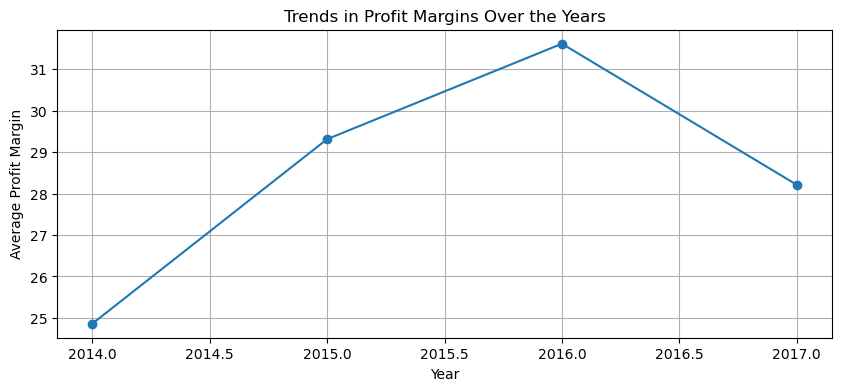

In [47]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Year'] = df['Order Date'].dt.year

# Calculate the average profit margin for each year
average_profit_margin = df.groupby('Year')['Profit'].mean()

plt.figure(figsize=(10, 4))
plt.plot(average_profit_margin.index, average_profit_margin.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Profit Margin')
plt.title('Trends in Profit Margins Over the Years')
plt.grid(True)

plt.show()

Observation: 
- 2016 has the highest average profit margin

# Impact of Discount Rate on Profitability of Individual Products:

In [48]:
df['Profit Impact'] = df['Discount'] * df['Sales']

# Group by product and calculate the total profit impact for each product
profit_impact = df.groupby('Product Name')['Profit Impact'].sum()

# Display the result
print("Impact of Discount Rate on Profitability of Individual Products:")
print(profit_impact.sample(5))


Impact of Discount Rate on Profitability of Individual Products:
Product Name
OIC Bulk Pack Metal Binder Clips             10.0512
Samsung HM1900 Bluetooth Headset             80.7760
Bevis Round Conference Table Top, X-Base    611.3789
Memorex Micro Travel Drive 4 GB              10.1760
Acme Value Line Scissors                      2.9200
Name: Profit Impact, dtype: float64


In [51]:
largest_product = profit_impact.nlargest(1)

smallest_product = profit_impact.nsmallest(1)

print("Product with the Largest Profit Impact:")
print(largest_product)

print("\nProduct with the Smallest Profit Impact:")
print(smallest_product)

Product with the Largest Profit Impact:
Product Name
Cisco TelePresence System EX90 Videoconferencing Unit    11319.24
Name: Profit Impact, dtype: float64

Product with the Smallest Profit Impact:
Product Name
3D Systems Cube Printer, 2nd Generation, Magenta    0.0
Name: Profit Impact, dtype: float64


Observation:
- Cisco TelePresence System EX90 Videoconferencing Unit profit margin is the highest
- 3D Systems Cube Printer, 2nd Generation, Magenta profit margin is the smallest

# Building a Regression Model

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


product_models = {}


for product_name in df['Product Name'].unique():
    # Filter the dataset for the current product
    product_df = df[df['Product Name'] == product_name]
    

    X = product_df[['Quantity', 'Discount']].values

    y = product_df['Profit'].values
  
    model = LinearRegression()
    
    model.fit(X, y)
  
    product_models[product_name] = model


product_name = input( )  # input the product name
product_data = df[df['Product Name'] == product_name][['Quantity', 'Discount']].values

if product_name in product_models:
    product_model = product_models[product_name]
    predicted_sales = product_model.predict(product_data)
    print("Predicted Profit for {}:".format(product_name))
    print(predicted_sales)
else:
    print("Product '{}' not found in the dataset.".format(product_name))


 Samsung HM1900 Bluetooth Headset


Predicted Profit for Samsung HM1900 Bluetooth Headset:
[46.095 19.755 19.755 43.9   32.925 13.17  19.755]


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


product_models = {}

for product_name in df['Product Name'].unique():
    # Filter the dataset for the current product
    product_df = df[df['Product Name'] == product_name]

    X = product_df[['Quantity', 'Discount']].values
    y = product_df['Profit'].values

    if len(X) < 2:
        print(f"Not enough data for {product_name}. Skipping.")
        continue

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    product_models[product_name] = model

product_name = input("Enter the product name: ")  # input the product name
product_data = df[df['Product Name'] == product_name][['Quantity', 'Discount']].values

if product_name in product_models:
    product_model = product_models[product_name]
    predicted_sales = product_model.predict(product_data)
    print(f"Predicted Profit for {product_name}:")
    print(predicted_sales)
else:
    print(f"Product '{product_name}' not found in the dataset.")


Not enough data for Cisco SPA 501G IP Phone. Skipping.
Not enough data for Hunt BOSTON Model 1606 High-Volume Electric Pencil Sharpener, Beige. Skipping.
Not enough data for Belkin 7 Outlet SurgeMaster Surge Protector with Phone Protection. Skipping.
Not enough data for Decoflex Hanging Personal Folder File. Skipping.
Not enough data for Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac. Skipping.
Not enough data for Xerox WorkCentre 6505DN Laser Multifunction Printer. Skipping.
Not enough data for Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier. Skipping.
Not enough data for Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection. Skipping.
Not enough data for Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner. Skipping.
Not enough data for Newell 342. Skipping.
Not enough data for Sanitaire Vibra Groomer IR Commercial Upright Vacuum, Replacement Belts. Skipping.
Not enough data for Rediform S.O.S.

Enter the product name:  Samsung HM1900 Bluetooth Headset


Predicted Profit for Samsung HM1900 Bluetooth Headset:
[46.095 19.755 19.755 43.9   32.925 13.17  19.755]


I added a check using if len(X) < 2 before attempting to split the data. 

If there are not enough data points for a product (less than 2), it will print a message indicating that there's not enough data for that product and skip it. 